In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data
data = pd.read_csv('new_dataset11.csv')

In [4]:
data.head()

,Employee_ID,Failed Login Attempts,Successful Login Attempts,Data Transferred (MB),Time of Day of Activity,Non-Work Related Activity (hrs),Files Accessed,Files Modified,System Errors,Job Title,Department,Length of Employment (years),Performance Reviews,Suspicious Activity,Malicious Activity,Insider Threat (Label)
0,1,2,10,500,3,3.0,5,1,0,Software Engineer,Engineering,4,Above Average,0,0,0
1,2,1,8,300,10,1.5,2,0,1,Sales Manager,Sales,2,Average,0,0,0
2,3,0,12,250,1,2.0,8,1,0,HR Manager,HR,5,Above Average,0,0,0
3,4,3,5,150,4,0.5,3,0,1,Marketing Manager,Marketing,3,Average,1,0,1
4,5,2,15,700,9,2.0,10,2,1,IT Manager,IT,6,Above Average,0,0,0


In [5]:
print(data['Job Title'].unique())
print(data['Department'].unique())
print(data['Performance Reviews'].unique())

['Software Engineer' 'Sales Manager' 'HR Manager' 'Marketing Manager'
 'IT Manager' 'Sales Representative' 'IT Technician' 'Engineer' 'Manager'
 'Software Developer' 'Sales Associate' 'Human Resources Coordinator'
 'Customer Service Representative' 'Accountant' 'Project Manager'
 'Systems Administrator' 'Human Resources Manager' 'IT Director'
 'Marketing Coordinator' 'Senior Software Engineer' 'Sales Director'
 'HR Director' 'Customer Service Rep' 'Account Manager' 'HR Generalist'
 'Marketing Specialist' 'Junior Developer' 'Data Analyst'
 'Director of Operations' 'Product Manager' 'Account Executive'
 'Marketing Analyst' 'IT Specialist' 'Financial Analyst'
 'Customer Service' 'Business Analyst']
['Engineering' 'Sales' 'HR' 'Marketing' 'IT' 'Support' 'Human Resources'
 'Customer Service' 'Finance' 'Project Management' 'Analytics'
 'Operations' 'Product']
['Above Average' 'Average' 'Below Average' 'Exceptional']


## DATA PREPROCESSING

In [6]:
# Checking for the missing values
data.isnull().sum()
print(data['Job Title'].unique())
print(data['Department'].unique())
print(data['Performance Reviews'].unique())

['Software Engineer' 'Sales Manager' 'HR Manager' 'Marketing Manager'
 'IT Manager' 'Sales Representative' 'IT Technician' 'Engineer' 'Manager'
 'Software Developer' 'Sales Associate' 'Human Resources Coordinator'
 'Customer Service Representative' 'Accountant' 'Project Manager'
 'Systems Administrator' 'Human Resources Manager' 'IT Director'
 'Marketing Coordinator' 'Senior Software Engineer' 'Sales Director'
 'HR Director' 'Customer Service Rep' 'Account Manager' 'HR Generalist'
 'Marketing Specialist' 'Junior Developer' 'Data Analyst'
 'Director of Operations' 'Product Manager' 'Account Executive'
 'Marketing Analyst' 'IT Specialist' 'Financial Analyst'
 'Customer Service' 'Business Analyst']
['Engineering' 'Sales' 'HR' 'Marketing' 'IT' 'Support' 'Human Resources'
 'Customer Service' 'Finance' 'Project Management' 'Analytics'
 'Operations' 'Product']
['Above Average' 'Average' 'Below Average' 'Exceptional']


### Observation there are no missing values

## Data Transformation:
## Transforming the categorical data into numerical data using LabelEncoder Technique

In [7]:
from sklearn.preprocessing import LabelEncoder
# Encode the categorical variables
label_encoder = LabelEncoder()
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['Performance Reviews'] = label_encoder.fit_transform(data['Performance Reviews'])

In [8]:
data["Job Title"]

0       34
1       30
2       13
3       24
4       17
        ..
1245    34
1246    31
1247     4
1248     7
1249     3
Name: Job Title, Length: 1250, dtype: int32

## DATA VISUALIZATION

## Scatter Plot to compare the relationship b/w Job and Insider Threat(Label)

Text(0.5, 1.0, 'Job VS Insider Threat (Label)')

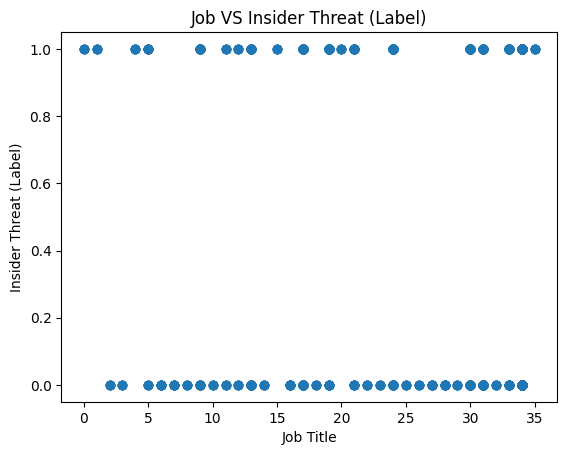

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data["Job Title"],data["Insider Threat (Label)"])
plt.xlabel("Job Title")
plt.ylabel("Insider Threat (Label)")
plt.title("Job VS Insider Threat (Label)")

### This bar chart shows the Total Average Data Transfered by each Job

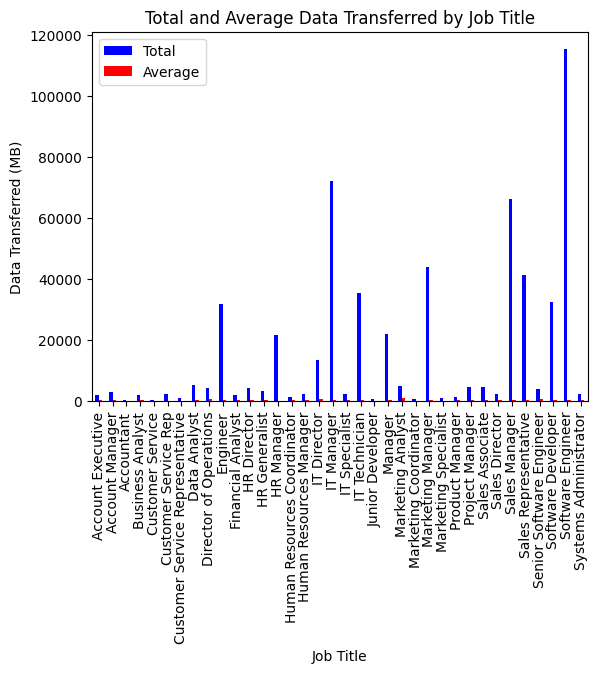

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas DataFrame
data =pd.read_csv('new_dataset11.csv')

# Create a grouped bar plot showing the total and average data transferred by job title
grouped_data = data.groupby('Job Title')['Data Transferred (MB)'].agg(['sum', 'mean'])
grouped_data.plot(kind='bar', color=['blue', 'red'])
plt.title('Total and Average Data Transferred by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Data Transferred (MB)')
plt.legend(['Total', 'Average'])
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
# Encode the categorical variables
label_encoder = LabelEncoder()
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['Performance Reviews'] = label_encoder.fit_transform(data['Performance Reviews'])

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and label (y)
X = data.drop(['Employee_ID', 'Insider Threat (Label)'], axis=1)
y = data['Insider Threat (Label)']
print(len(X))
print(len(y))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


1250
1250


In [13]:
X_train.head()

,Failed Login Attempts,Successful Login Attempts,Data Transferred (MB),Time of Day of Activity,Non-Work Related Activity (hrs),Files Accessed,Files Modified,System Errors,Job Title,Department,Length of Employment (years),Performance Reviews,Suspicious Activity,Malicious Activity
1194,0,12,400,3,1.0,3,1,0,31,11,3,0,0,0
911,1,6,300,10,0.5,5,1,1,31,11,1,2,1,0
422,4,10,300,15,0.5,5,2,0,27,10,7,0,0,0
670,2,7,150,8,0.5,4,0,1,31,11,1,2,1,0
931,2,8,400,11,1.0,4,0,1,34,2,5,3,0,0


In [14]:
y_train.head()

1194    0
911     1
422     0
670     1
931     0
Name: Insider Threat (Label), dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Define the classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = RandomForestClassifier()
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
# Compare the classifiers using cross-validation
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)
y_pred4=clf4.predict(X_test)
a1= accuracy_score(y_test, y_pred1)
a2=accuracy_score(y_test, y_pred2)
a3=accuracy_score(y_test, y_pred3)
a4=accuracy_score(y_test, y_pred4)
print("Accuracy Logistic Regression: " ,a1*100)
print("Accuracy Decision Tree: " , a2*100)
print("Accuracy Naive Bayes:" , a3*100)
print("Accuracy Random Forest:" , a4*100)

Accuracy Logistic Regression:  94.0
Accuracy Decision Tree:  100.0
Accuracy Naive Bayes: 96.0
Accuracy Random Forest: 100.0


In [17]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred5=svm_clf.predict(X_test)
a5= accuracy_score(y_test, y_pred5)
print("Accuracy SVM:" , a5*100)

Accuracy SVM: 97.6


In [18]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)
cm4 = confusion_matrix(y_test,y_pred4)
cm5 = confusion_matrix(y_test,y_pred5)

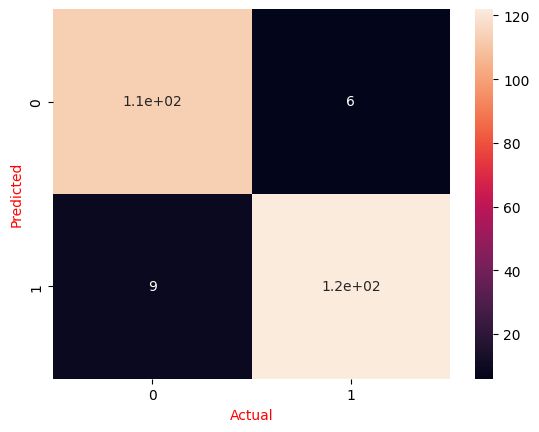

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm1,annot = True)
plt.xlabel("Actual",color = "red")
plt.ylabel("Predicted",color = "red")
plt.show()

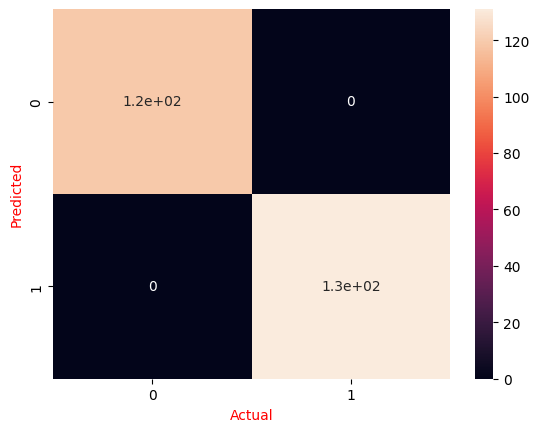

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm2,annot = True)
plt.xlabel("Actual",color = "red")
plt.ylabel("Predicted",color = "red")
plt.show()

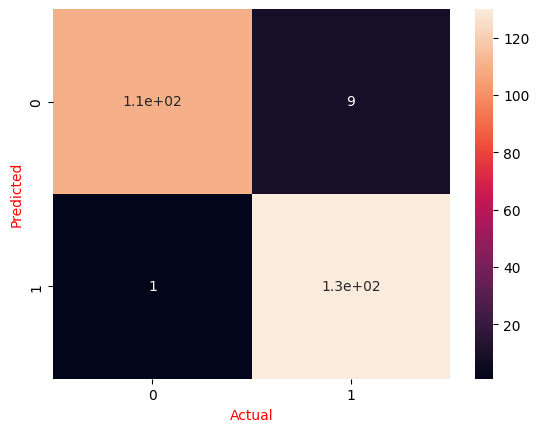

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm3,annot = True)
plt.xlabel("Actual",color = "red")
plt.ylabel("Predicted",color = "red")
plt.show()

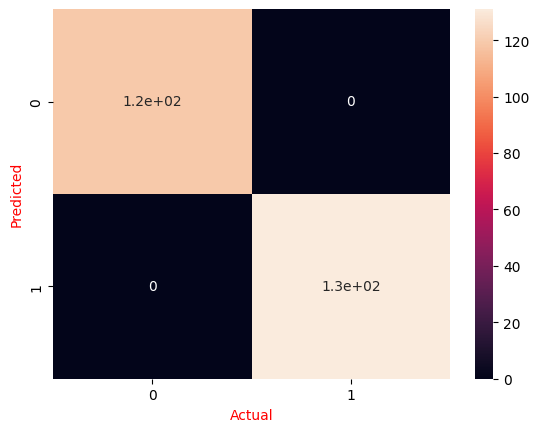

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm4,annot = True)
plt.xlabel("Actual",color = "red")
plt.ylabel("Predicted",color = "red")
plt.show()

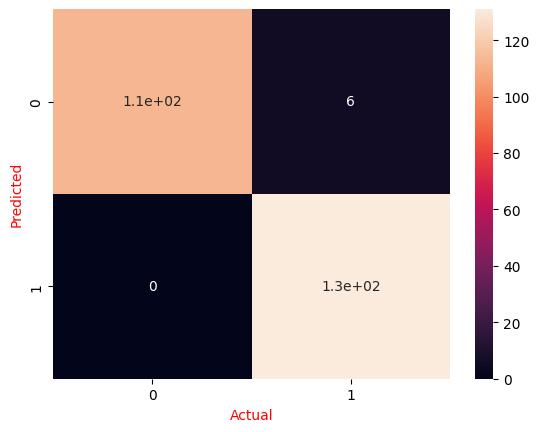

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm5,annot = True)
plt.xlabel("Actual",color = "red")
plt.ylabel("Predicted",color = "red")
plt.show()

In [24]:
from sklearn.metrics import classification_report
print("Report LR")
report = classification_report(y_test,y_pred1)
print(report)

Report LR
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       119
           1       0.95      0.93      0.94       131

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [25]:
from sklearn.metrics import classification_report
print("Report for DT")
report = classification_report(y_test,y_pred2)
print(report)

Report for DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       131

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [26]:
from sklearn.metrics import classification_report
print("Report for NB")
report = classification_report(y_test,y_pred3)
print(report)

Report for NB
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       119
           1       0.94      0.99      0.96       131

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [27]:
from sklearn.metrics import classification_report
print("Report for RF")
report = classification_report(y_test,y_pred4)
print(report)

Report for RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       131

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [28]:
from sklearn.metrics import classification_report
print("Report for SVM")
report = classification_report(y_test,y_pred5)
print(report)

Report for SVM
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       119
           1       0.96      1.00      0.98       131

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



In [29]:
import pickle
# Save the SVM model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_clf, file)
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(clf1, file)
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(clf2, file)
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(clf3, file)
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(clf4, file)


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
n_hidden_rbm = 256
n_hidden_dbn = 128
rbm = Sequential()
rbm.add(Dense(n_hidden_rbm, activation='relu', input_shape=(n_visible,)))
rbm.add(Dropout(0.2))
rbm.add(Dense(n_visible, activation='relu'))

dbn = Sequential()
dbn.add(Dense(n_hidden_dbn, input_shape=(n_visible,)))
dbn.add(LeakyReLU(alpha=0.1))
dbn.add(BatchNormalization())
dbn.add(Dropout(0.3))
dbn.add(Dense(n_hidden_dbn))
dbn.add(LeakyReLU(alpha=0.1))
dbn.add(BatchNormalization())
dbn.add(Dropout(0.3))
dbn.add(Dense(n_hidden_dbn))
dbn.add(LeakyReLU(alpha=0.1))
dbn.add(BatchNormalization())
dbn.add(Dropout(0.3))
dbn.add(Dense(1, activation='sigmoid'))

rbm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
rbm.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=32)

hidden_X = rbm.predict(X_train_scaled)

dbn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
dbn.fit(hidden_X, y_train, epochs=50, batch_size=64)
hidden_X_test = rbm.predict(X_test_scaled)
loss, accuracy = dbn.evaluate(hidden_X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [26]:
rbm.save('rbm_model.h5')
dbn.save('dbn_model.h5')